In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 32
img_height = 180
img_width = 180

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './datasets',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 648 files belonging to 15 classes.
Using 519 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   './datasets',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 648 files belonging to 15 classes.
Using 129 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['경천사 십층석탑', '고종황제', '고종황제 옥보', '금책', '동의보감', '수표', '열하일기', '일,청,한 담판도', '진신편람', '징비록', '측우기', '칙명지보', '태조 어진', '혼일강리역대국도지도', '황해조천도']


C:\Anaconda\envs\music_category_classification\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\music_category_classification\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\music_category_classification\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\music_category_classification\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\music_category_classification\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL 

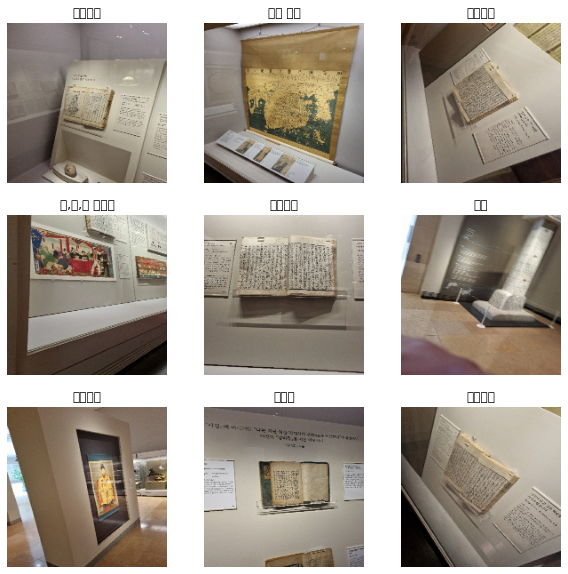

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [10]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.89771247


In [11]:
num_classes = 15

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [14]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
17/17 [==============================] - 6s 365ms/step - loss: 2.3118 - accuracy: 0.2871 - val_loss: 1.7563 - val_accuracy: 0.5504
Epoch 2/10
17/17 [==============================] - 5s 281ms/step - loss: 1.3315 - accuracy: 0.6609 - val_loss: 0.9462 - val_accuracy: 0.7209
Epoch 3/10
17/17 [==============================] - 5s 281ms/step - loss: 0.5994 - accuracy: 0.8536 - val_loss: 0.3737 - val_accuracy: 0.9147
Epoch 4/10
17/17 [==============================] - 5s 278ms/step - loss: 0.2690 - accuracy: 0.9287 - val_loss: 0.3356 - val_accuracy: 0.8992
Epoch 5/10
17/17 [==============================] - 5s 278ms/step - loss: 0.2019 - accuracy: 0.9480 - val_loss: 0.5452 - val_accuracy: 0.8837
Epoch 6/10
17/17 [==============================] - 5s 277ms/step - loss: 0.1356 - accuracy: 0.9672 - val_loss: 0.3433 - val_accuracy: 0.9070
Epoch 7/10
17/17 [==============================] - 5s 278ms/step - loss: 0.1028 - accuracy: 0.9730 - val_loss: 0.4100 - val_accuracy: 0.8760
Epoch 

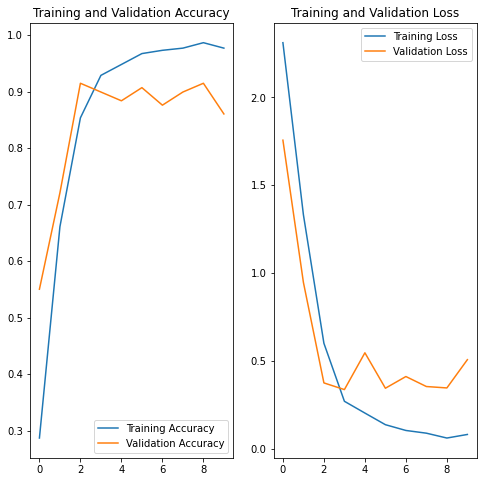

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

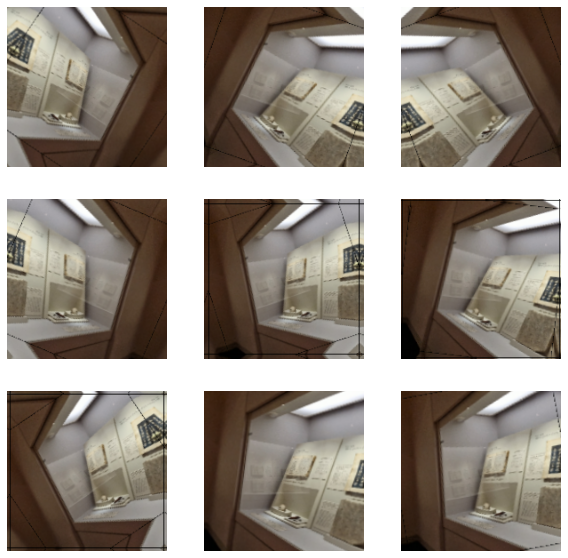

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [18]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [21]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
model.save('./pj.h5')

Epoch 1/15
17/17 [==============================] - 6s 337ms/step - loss: 2.4924 - accuracy: 0.1792 - val_loss: 2.1524 - val_accuracy: 0.3178
Epoch 2/15
17/17 [==============================] - 6s 333ms/step - loss: 1.9174 - accuracy: 0.3988 - val_loss: 1.6129 - val_accuracy: 0.4109
Epoch 3/15
17/17 [==============================] - 6s 326ms/step - loss: 1.5305 - accuracy: 0.5202 - val_loss: 1.6194 - val_accuracy: 0.4341
Epoch 4/15
17/17 [==============================] - 6s 328ms/step - loss: 1.0805 - accuracy: 0.6724 - val_loss: 0.7670 - val_accuracy: 0.7442
Epoch 5/15
17/17 [==============================] - 6s 336ms/step - loss: 0.7793 - accuracy: 0.7919 - val_loss: 0.5088 - val_accuracy: 0.8217
Epoch 6/15
17/17 [==============================] - 6s 326ms/step - loss: 0.6025 - accuracy: 0.8150 - val_loss: 0.3490 - val_accuracy: 0.8605
Epoch 7/15
17/17 [==============================] - 6s 328ms/step - loss: 0.4036 - accuracy: 0.8844 - val_loss: 0.3381 - val_accuracy: 0.8682
Epoch 

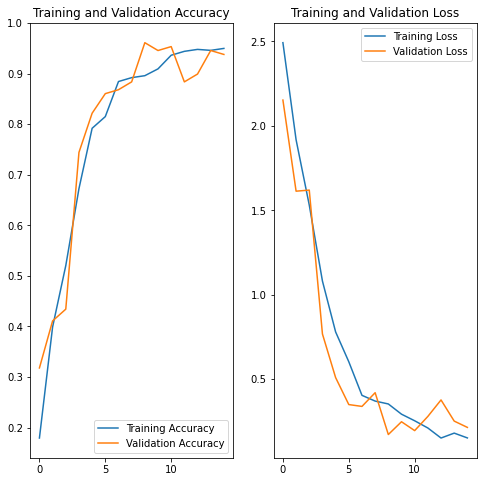

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
sunflower_path = "./test/153E69354C69F1BC56.jpg"
img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
# for i in score:
#   print(i)
# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )
a = class_names[np.argmax(score)]
b = np.max(score)

if b > 0.90 :
  print(
       "이 작품의 이름은" +" "+ "{} ".format(a)
  )
  print(
       "확률은" + "{} ".format(b)
  )
else:
  print("다시 촬영해주세요")


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

이 작품의 이름은 경천사 십층석탑 
확률은0.9999380111694336 
This image most likely belongs to 경천사 십층석탑 with a 99.99 percent confidence.
